In [1]:
import os
import requests
import csv
from zipfile import ZipFile
from pathlib import Path
import pandas as pd
from typing import List, Optional
import numpy as np

path = '/home/ikira/Desktop/'
zippath = path + 'zipdir/'
print(zippath)
filepath = ''

url = 'http://api.bestchange.ru/info.zip'
if url.find('/'):
    filename = url.rsplit('/', 1)[1]
    filepath = path + filename
else:
    filepath = path + 'infozip'

/home/ikira/Desktop/zipdir/


In [2]:
r = requests.get(url, allow_redirects=True)
open(f'{filepath}', 'wb').write(r.content)

with ZipFile(filepath, 'r') as zipObj:
    zippath = path + 'zipdir/'
    print(zippath)
    a = zipObj.extractall(zippath)
        

/home/ikira/Desktop/zipdir/


In [3]:
with open('/home/ikira/Desktop/zipdir/bm_cy.dat', encoding = "ISO-8859-1") as dat_file, open('/home/ikira/Desktop/zipdir/id_currency.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file)
    for line in dat_file:
        uline = line.encode('utf-8').decode('utf-8')
        row = [field.strip() for field in uline.split(';')]
        if len(row) == 7 and row[3] and row[4]:
            if ('Tether' in row[2]):
                print(row[0], row[2])
            csv_writer.writerow([row[0] + ';' + row[2]])

163 Tether Omni (USDT)
10 Tether TRC20 (USDT)
36 Tether ERC20 (USDT)


In [4]:
for f in os.listdir(zippath):
    if '.dat' in f: 
        os.remove(os.path.join(zippath, f))

In [5]:
with ZipFile(filepath, 'r') as zipObj:
   a = zipObj.extractall(path+'zipdir')
   print(a)
    
init_state = 0

None


In [6]:
def query_currency_id(data,currency_name):
    pass

In [7]:
def currency_rate_retrieval(filename, cur_1, cur_2) -> Optional[List]:
    if filename[0].isdigit() and  filename.split('.')[1] == 'csv':
        print(f'{zippath}{x}')
        data_new = pd.read_csv(f'{zippath}{x}', sep = ';', names = ['cur_give_id', 'cur_take_id', 'saler_id', 'cur_give_num', 'cur_take_num']) 
        row = data_new[(data_new.cur_give_id == cur_1) & (data_new.cur_take_id == cur_2)]
        row['id'] = int(filename.split('_')[0])
        return row
            
            

In [8]:

# currency_rate_retrieval([x for x in os.listdir(zippath)], 93, 935)

In [9]:
def bm_rates_dat_to_csv_converter(path_filename):
    with open(path_filename, encoding = "ISO-8859-1") as dat_file, open(path_filename[:-3]+'csv', 'w') as csv_file:
        csv_writer = csv.writer(csv_file)
        print(csv_writer)
        for line in dat_file:
            uline = line.encode('utf-8').decode('utf-8')
            row = [field.strip() for field in uline.split(';')]
            csv_writer.writerow([row[0] + ';' + row[1] + ';' + row[2] + ';' + row[3] + ';' + row[4]])

In [10]:
def cleaner(path, ending):
    for f in os.listdir(path):
        if ending in f:
            os.remove(os.path.join(path, f))
    

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
19_bm_rates.csv
/home/ikira/Desktop/zipdir/19_bm_rates.csv
1_bm_rates.csv
/home/ikira/Desktop/zipdir/1_bm_rates.csv
3_bm_rates.csv
/home/ikira/Desktop/zipdir/3_bm_rates.csv
13_bm_rates.csv
/home/ikira/Desktop/zipdir/13_bm_rates.csv
0_bm_rates.csv
/home/ikira/Desktop/zipdir/0_bm_rates.csv


/home/ikira/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4_bm_rates.csv
/home/ikira/Desktop/zipdir/4_bm_rates.csv
11_bm_rates.csv
/home/ikira/Desktop/zipdir/11_bm_rates.csv
12_bm_rates.csv
/home/ikira/Desktop/zipdir/12_bm_rates.csv
9_bm_rates.csv
/home/ikira/Desktop/zipdir/9_bm_rates.csv
8_bm_rates.csv
/home/ikira/Desktop/zipdir/8_bm_rates.csv
18_bm_rates.csv
/home/ikira/Desktop/zipdir/18_bm_rates.csv
16_bm_rates.csv
/home/ikira/Desktop/zipdir/16_bm_rates.csv
10_bm_rates.csv
/home/ikira/Desktop/zipdir/10_bm_rates.csv
7_bm_rates.csv
/home/ikira/Desktop/zipdir/7_bm_rates.csv
6_bm_rates.csv
/home/ikira/Desktop/zipdir/6_bm_rates.csv
5_bm_rates.csv
/home/ikira/Desktop/zipdir/5_bm_rates.csv
2_bm_rates.csv
/home/ikira/Desktop/zipdir/2_bm_rates.csv
14_bm_rates.csv
/home/ikira/Desktop/zipdir/14_bm_rates.csv
17_bm_rates.csv
/home/ikira/Desktop/zipdir/17_bm_rates.csv
15_bm_rates.csv
/home/ikira/Desktop/zipdir/15_bm_rates.csv
        cur_give_id  cur_take_id  saler_id  cur_give_num  cur_take_num  id
118782           63          139       397  30024.6255

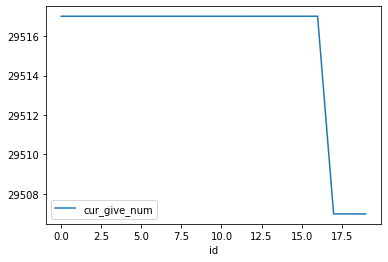

In [26]:
while True:
    for i in range(20):
        try:
            r = requests.get(url, allow_redirects=True)
            open(f'{path}{filename}', 'wb').write(r.content)
            print('ok')
            with ZipFile(filepath, 'r') as zipObj:
                zippath = path + 'zipdir/'
                a = zipObj.extractall(zippath)
                for file in os.listdir(zippath):
                    if 'bm_rates.dat' == file:
                        os.rename(zippath + file, zippath + f"{i}_{file}")
                        bm_rates_dat_to_csv_converter(zippath + f"{i}_{file}")
                cleaner(zippath, 'dat')
        except:
            print('bad_request')
    ans = []
    for x in os.listdir(zippath):
        if 'bm_rates.csv' in x:
            print(x)
            row = currency_rate_retrieval(x, 63,139)
            ans.append(row)
    appended = pd.concat(ans).sort_values(by=['id'])
    print(appended)
        
    print('allright')
    last_period = appended['id'].max()
    print(last_period)
    print('aaa',  appended['cur_give_num'].min())
    min_value = appended['cur_give_num'].min()
    best = appended.loc[(appended['id'] == last_period) & (appended['cur_give_num'] == min_value), 'saler_id']
    print(best)
    print(best.values)
    dots = appended.loc[appended['saler_id'] == best.values[0], ['cur_give_num', 'id']]
    dots.plot(x='id', y='cur_give_num')
    print(dots)
    
    break
